In [14]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

In [6]:
btc = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [8]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


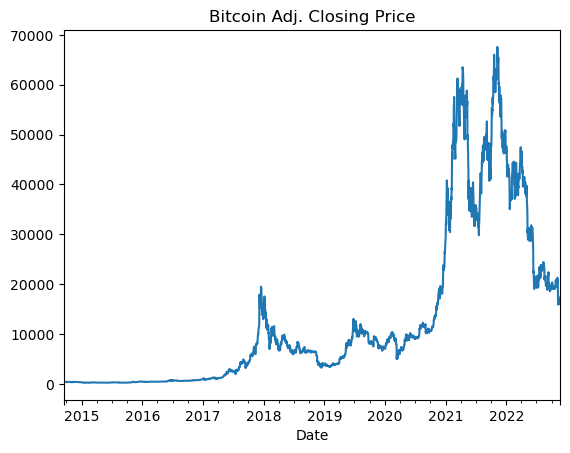

In [10]:
btc_p=btc['Adj Close']
btc_p.plot(title='Bitcoin Adj. Closing Price');

## Stationarity

#### To analyze the time series and its stationary, we can use adfuller test

In [12]:
# H0: userAcceleration.x is not stationary
result = adfuller(btc_p)
print('p-value: %.2f' % result[1])


p-value: 0.47


##### p-value > 0.05, we accept H0 and conclude that our time serie is not stationary

## Autocorrelation

Calculate the ACF 

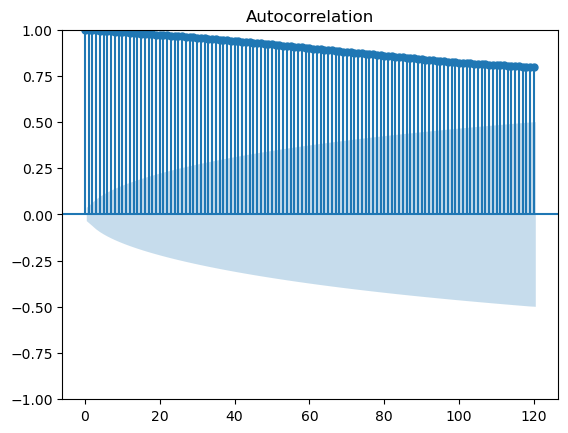

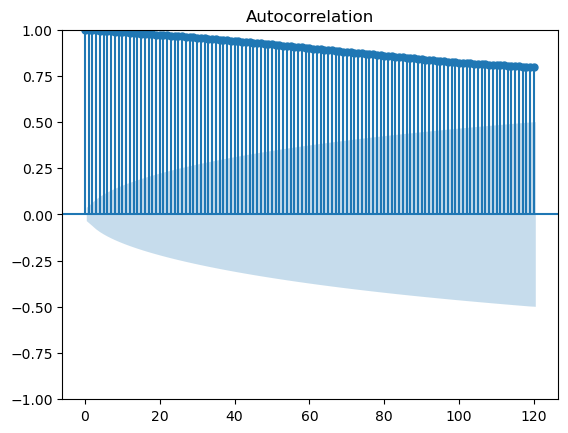

In [19]:
plot_acf(btc_p,lags=120)

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

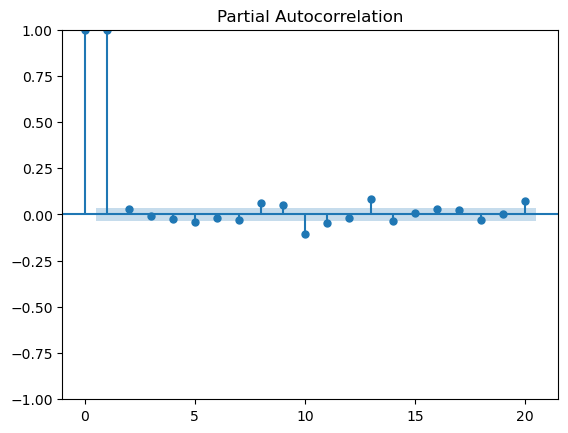

In [24]:
plot_pacf(btc_p,lags=20);
plt.show

 We need to make our data stationary

In [25]:
# we need to transform it to stationary serie
btc['diff'] = btc['Adj Close'].diff()

result = adfuller(btc['diff'].dropna())
print(f'p-value: {result[1]}')
# now p-value < 0.05, we reject H0 and conclude that our time series is stationary

p-value: 4.127173548421062e-15


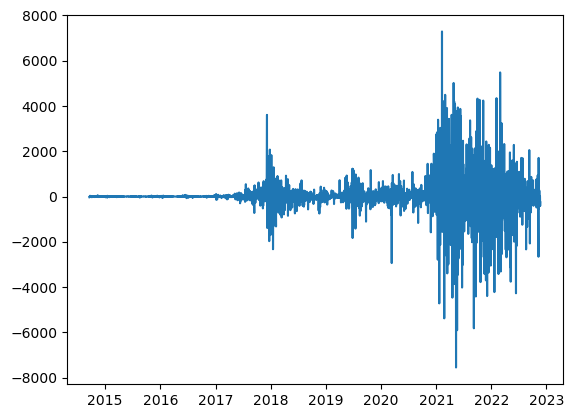

In [27]:
plt.plot(btc['diff'] );